Step 2.6: Building Model with Deep Learning

In [1]:
# Isolate the Rossmann Store Sales Dataset into Time Series Data

import pandas as pd

# Load the dataset
data = pd.read_csv('../data/rossmann-store-sales/train.csv')

# Convert 'Date' to datetime
data['Date'] = pd.to_datetime(data['Date'])

# Group by date and sum sales
time_series_data = data.groupby('Date')['Sales'].sum().reset_index()

C:\Users\25192.PS\AppData\Local\Temp\ipykernel_14396\2387410316.py:6: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('../data/rossmann-store-sales/train.csv')
C:\Users\25192.PS\AppData\Local\Temp\ipykernel_14396\2387410316.py:9: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  data['Date'] = pd.to_datetime(data['Date'])


In [3]:
# Check Whether Your Time Series Data is Stationary
"""
You can use the Augmented Dickey-Fuller test.
If the p-value is less than 0.05, the data is stationary. If the data is not stationary, difference it
"""
from statsmodels.tsa.stattools import adfuller

result = adfuller(time_series_data['Sales'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])

# Differencing Your Time Series Data:
if result[1] > 0.05:
    time_series_data['Sales'] = time_series_data['Sales'].diff().dropna()

ADF Statistic: -4.761614524595634
p-value: 6.436731330558783e-05


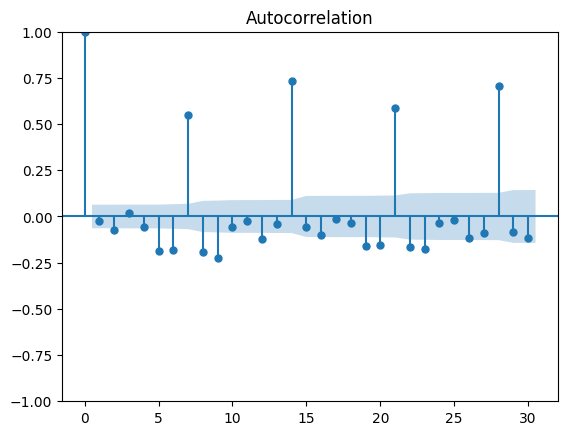

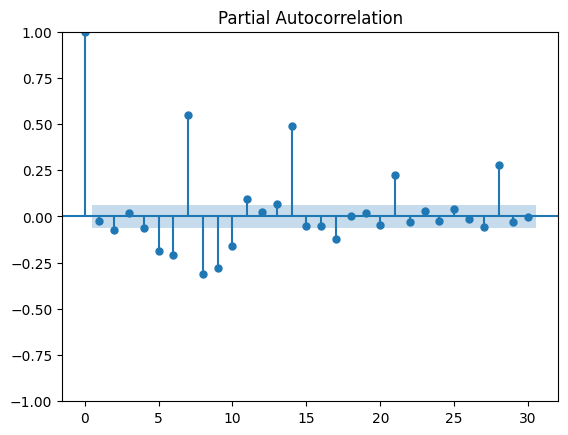

In [4]:
# Check for Autocorrelation and Partial Autocorrelation: Use the ACF and PACF plots.

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

plot_acf(time_series_data['Sales'].dropna())
plt.title('Autocorrelation')
plt.show()

plot_pacf(time_series_data['Sales'].dropna())
plt.title('Partial Autocorrelation')
plt.show()

In [5]:
# Transform the Time Series Data into Supervised Learning Data: Create a sliding window to form the input features and target column.

def create_dataset(data, time_step=1):
    X, y = [], []
    for i in range(len(data) - time_step - 1):
        a = data[i:(i + time_step), 0]
        X.append(a)
        y.append(data[i + time_step, 0])
    return np.array(X), np.array(y)

import numpy as np

time_series_data = time_series_data['Sales'].values
time_series_data = time_series_data.reshape(-1, 1)

time_step = 10  # You can adjust this value
X, y = create_dataset(time_series_data, time_step)

In [6]:
# Scale Your Data in the (-1, 1) Range: Use MinMaxScaler from sklearn

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(-1, 1))
X = scaler.fit_transform(X)
y = scaler.fit_transform(y.reshape(-1, 1))

In [7]:
# Build an LSTM Regression Model: Now, you can build and train your LSTM model using TensorFlow.

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# Reshape input to be [samples, time steps, features]
X = X.reshape(X.shape[0], X.shape[1], 1)

# Build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(X.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(50))
model.add(Dropout(0.2))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')

# Fit the model
model.fit(X, y, epochs=50, batch_size=32)

Epoch 1/50


e:\EDUCATION\Kifiya_AI_Mastery_Program\week-4\w4venv\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.1664
Epoch 2/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1568
Epoch 3/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1631
Epoch 4/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1672
Epoch 5/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1451
Epoch 6/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1596
Epoch 7/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1588
Epoch 8/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1713
Epoch 9/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1567
Epoch 10/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1623
Epoch 11/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1606
Epoch 12/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1617
Epoch 13/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1478
Epoch 14/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1596
Epoch 15/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1688
Epoch 16/50
30/30 ━━━━━━━━━━━━

Evaluating the performance of your LSTM model

Epoch 1/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0228 - val_loss: 0.0421
Epoch 2/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0254 - val_loss: 0.0380
Epoch 3/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0257 - val_loss: 0.0373
Epoch 4/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0298 - val_loss: 0.0401
Epoch 5/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0210 - val_loss: 0.0399
Epoch 6/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0210 - val_loss: 0.0383
Epoch 7/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0182 - val_loss: 0.0378
Epoch 8/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0212 - val_loss: 0.0387
Epoch 9/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0227 - val_loss: 0.0372
Epoch 10/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0240 - val_loss: 0.0384
Epoch 11/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0209 - val_loss: 0.0367
Epoch 12/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0203 - val_lo

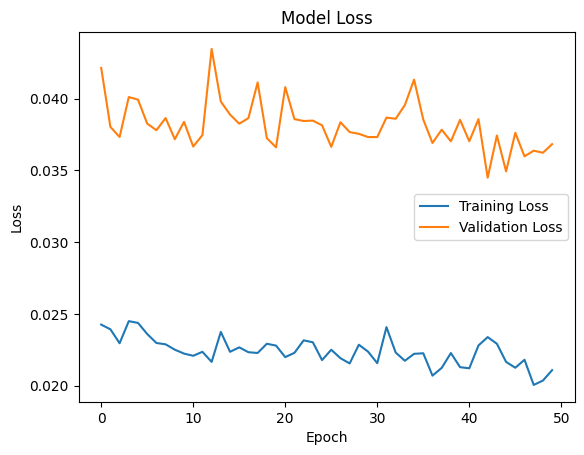

NameError: name 'y_test' is not defined

<Figure size 1500x500 with 0 Axes>

In [11]:
# 1. Loss Function

history = model.fit(X, y, epochs=50, batch_size=32, validation_split=0.2)

# You can visualize the training and validation loss over epochs
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()
'''
# 2. Mean Squared Error (MSE)

y_pred = model.predict(X_test)
y_pred = scaler.inverse_transform(y_pred)  # Inverse scaling if needed
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# 3. Mean Absolute Error (MAE)

from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error: {mae}')

# 4. R-squared (R²)

from sklearn.metrics import r2_score

r2 = r2_score(y_test, y_pred)
print(f'R-squared: {r2}')
'''
# 5. Visualize Predictions

plt.figure(figsize=(15, 5))
plt.plot(y_test, label='Actual Sales')
plt.plot(y_pred, label='Predicted Sales')
plt.title('Actual vs Predicted Sales')
plt.xlabel('Time')
plt.ylabel('Sales')
plt.legend()
plt.show()

# 6. Residual Analysis

residuals = y_test - y_pred
plt.figure(figsize=(15, 5))
plt.plot(residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residuals')
plt.xlabel('Time')
plt.ylabel('Residuals')
plt.show()